In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

#soft max
def softMax(h):
    return np.exp(h) / np.vstack(np.exp(h).sum(axis=1))

def cross_entropy(y, p):
    return -np.sum(y*np.log(p))

def accuracy(Y,p):
    return np.mean(Y.argmax(axis = 1) == p.argmax(axis = 1))


def GD(best_w,l1,l2):
    eta = 6e-5
    epochs = 5000

    for t in range(epochs):
        p = softMax(X.dot(best_w))
        best_w -= eta*(X.T.dot(p - Y) + l1*np.sign(best_w) + l2*best_w)
    return best_w

In [3]:
df = pd.read_csv("usps_digit_recognizer.csv")

In [4]:
df = df.loc[:, (df != 0).any(axis=0)]

In [5]:
df.shape

(42000, 709)

In [6]:
Train = int(df.shape[0] * 0.6)
Validate = int(df.shape[0] * 0.2)
Test = int(df.shape[0] - Train - Validate)

Train_Model =  df[:Train:]
Validate_Model = df[Train:Validate + Train:]
Test_Model = df[Validate + Train::]


In [7]:
y = Train_Model["label"]
#y.head()
y2 = Validate_Model["label"]
y3 = Test_Model["label"]

In [8]:
Y = pd.get_dummies(y)
Y2 = pd.get_dummies(y2)
Y3 = pd.get_dummies(y3)

Y = np.array(Y)
Y2 = np.array(Y2)
Y3 = np.array(Y3)


In [9]:
x = Train_Model.drop(['label'], axis=1)
x2 = Validate_Model.drop(['label'], axis=1)
x3 = Test_Model.drop(['label'], axis=1)

In [10]:
x = x/255
x2 = x2/255
x3 = x3/255

In [11]:
X = np.hstack((np.ones((x.shape[0],1)), x))

In [12]:
X2 = np.hstack((np.ones((x2.shape[0],1)), x2))
X3 = np.hstack((np.ones((x3.shape[0],1)), x3))

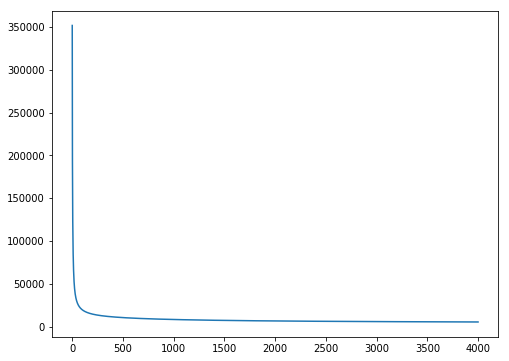

In [13]:
w = np.random.randn(X.shape[1],Y.shape[1])


J = []
eta = 6e-5
epochs = 4000

for t in range(epochs):
    p = softMax(X.dot(w))
    J.append(cross_entropy(Y, p))
    w -= eta*(X.T.dot(p - Y))
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [14]:
#accuracy(Y,p)

np.mean(Y.argmax(axis = 1) == p.argmax(axis = 1))


0.9371825396825397

In [24]:
#best_w_sofar = w
#best_w_sofar = Train[0]

w_0 = w.copy()

In [25]:
#w = np.random.randn(X.shape[1],X.shape[0])

J = []
eta = 6e-5
epochs = int(1e3)

for l1 in range (10):
    for l2 in range (10):
        for t in range(epochs):
            p = softMax(X.dot(w_0))
            w_0 -= eta*(X.T.dot(p - Y) + l1*np.sign(w_0) + l2*w_0)
            
        p_v = softMax(X2.dot(w_0))
        J.append(((cross_entropy(Y2, p_v)), l1,l2))

In [26]:
min(J)

(2435.578103303152, 0, 9)

In [36]:
L1 = min(J)[1]
L2 = min(J)[2]

print(L1,L2)

0 9


therefore the best l1 is 0, and l2 is 9


New Result2: 
Train Accuracy: 0.9357539682539683
Val Accuracy: 0.9160714285714285
Test Accuracy: 0.9232142857142858

In [28]:
Finial_w = GD(w_0,L1,L2)


In [29]:
p = softMax(X.dot(Finial_w))
p_v = softMax(X2.dot(Finial_w))
p_T = softMax(X3.dot(Finial_w))

print("New Result: ")
print("Train Accuracy: {}".format(accuracy(Y,p)))
print("Val Accuracy: {}".format(accuracy(Y2,p_v)))
print("Test Accuracy: {}".format(accuracy(Y3,p_T)))

New Result: 
Train Accuracy: 0.9354761904761905
Val Accuracy: 0.915952380952381
Test Accuracy: 0.9233333333333333


In [46]:
Finial_w = GD(Finial_w,L1,L2)
p = softMax(X.dot(Finial_w))
p_v = softMax(X2.dot(Finial_w))
p_T = softMax(X3.dot(Finial_w))

print("New Result3: ")
print("Train Accuracy: {}".format(accuracy(Y,p)))
print("Val Accuracy: {}".format(accuracy(Y2,p_v)))
print("Test Accuracy: {}".format(accuracy(Y3,p_T)))

New Result3: 
Train Accuracy: 0.9357539682539683
Val Accuracy: 0.9160714285714285
Test Accuracy: 0.9232142857142858


In [45]:
np.sum(Finial_w)

5.947146458629149e-08

In [42]:
np.sum(Finial_w)

8.855636204341266e-07

In [43]:
p = softMax(X.dot(Finial_w))
p_v = softMax(X2.dot(Finial_w))
p_T = softMax(X3.dot(Finial_w))

print("New Result3: ")
print("Train Accuracy: {}".format(accuracy(Y,p)))
print("Val Accuracy: {}".format(accuracy(Y2,p_v)))
print("Test Accuracy: {}".format(accuracy(Y3,p_T)))

New Result3: 
Train Accuracy: 0.9357539682539683
Val Accuracy: 0.9160714285714285
Test Accuracy: 0.9232142857142858


The following are for image only

In [30]:
df = pd.read_csv("usps_digit_recognizer.csv")
Pic_x = df.drop(['label'], axis=1)

In [31]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


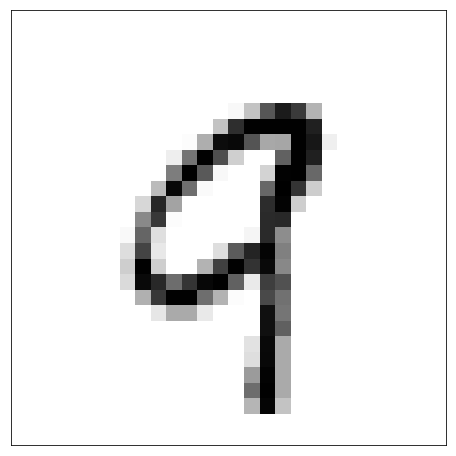

In [32]:
row=41999
img = Pic_x.loc[row,:]
img = np.array(img).reshape(28,28)
fig = plt.figure(figsize=(8,8))
plt.imshow(1-img/255, cmap=plt.get_cmap('gray'))
plt.xticks([])
plt.yticks([]);

plt.savefig('./Numbers/num9.png')